# Kmeans from scratch


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=[100, 100, 100], centers = None, n_features=2, random_state=0, cluster_std=0.4)

def getCentroids(X, y_prev, classes):
    centroids = np.empty((0, len(X[0])))
    for c in classes:
        el = X[np.where(y_prev == c)]

        if len(el) == 0:
            centroids = np.vstack([centroids, np.zeros((1, len(X[0])))])
        else:
            centroids = np.vstack([centroids, np.mean(el, axis=0)])
    
    return centroids



def kmeans(X, num_clusters, max_iter=None):
    np.random.seed(1)
    y_pred = np.random.randint(1, num_clusters + 1, size=len(X))
    classes = np.unique(y_pred)
    iter = 0
    while True:
        y_prev = y_pred

        # calculate previous centroids
        centroids = getCentroids(X, y_prev, classes)

        # classify each point
        y_pred = []
        for pt in X:
            dists = np.sum((centroids - pt) ** 2, axis=1)
            y_pred.append(classes[np.argmin(dists)])
        
        y_pred = np.array(y_pred)

        # check if no change between prev and pred
        if np.array_equal(y_pred, y_prev):
            break

        iter += 1
        if max_iter and iter == max_iter:
            break 

    return y_pred

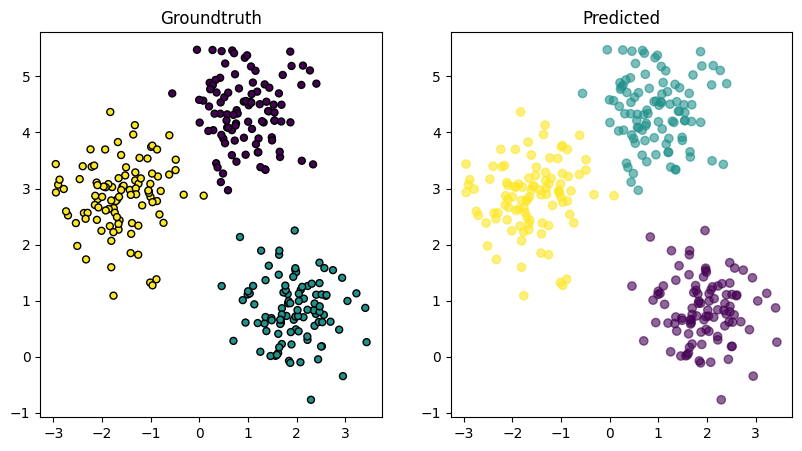

In [9]:
# good kmeans result
from sklearn.datasets import make_blobs

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Groundtruth")
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Predicted")

X, y = make_blobs(n_samples=[100, 100, 100], centers = None, n_features=2, random_state=0, cluster_std=0.6)
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

y_pred = kmeans(X, num_clusters=3)
scatter = ax2.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.show()

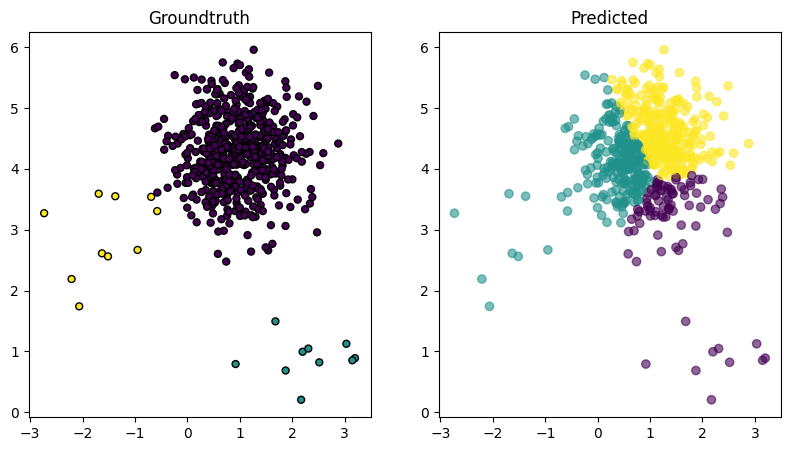

In [10]:
# Finding a poor kmeans result

fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title("Groundtruth")
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title("Predicted")

X, y = make_blobs(n_samples=[580, 10, 10], centers = None, n_features=2, random_state=0, cluster_std=0.6)
ax1.scatter(X[:, 0], X[:, 1], marker="o", c=y, s=25, edgecolor="k")

y_pred = kmeans(X, num_clusters=3)
scatter = ax2.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', alpha=0.6)
plt.show()